## FaceNet single-predictor models
Set of models investigating face perception:
- single-predictor model with binary regressor coding for presence of any face (**any_faces**)
- **any_faces** + regressor coding for first appearance face for the first time (**first_time_face**)
- **any_faces** + log of time since last appearance of detected face (mean across faces if more than one are present in the frame, **log_mean_time_since**) 
- **any_faces** + log of time since last appearance of detected face (max across multiple faces, **log_max_time_since**) 
- **any_faces** + log of cumulative time the detected face has been on screen (mean across faces, **log_mean_face_time_cum**)
- **any_faces** + log of cumulative time the detected face has been on screen (max across faces, **log_max_face_time_cum**)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tools.create import create_set_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from tools.viz import (plot_regressor, plot_regressor,
                       plot_metrics, plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline

In [3]:
api = Neuroscout()

## Define predictors and confounds

In [4]:
predictors = [['any_faces']]
other = ['first_time_face', 'log_mean_time_since', 'log_max_time_since', 'log_mean_face_time_cum', 'log_max_face_time_cum']
for p in other:
    predictors.append(['any_faces', p])

In [5]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

## Create models

In [6]:
mdict = {}
for pset in predictors:
    mdict['+'.join(pset)] = create_set_models(pset, confounds, name='+'.join(pset), datasets={'Budapest': {'id': 27, 'tasks': ['movie']}})

In [19]:
filename = Path('models') / 'facenet.json'

In [23]:
dump_collection(mdict, filename)

In [20]:
mdict = load_collection(filename)

## Generate reports

In [9]:
for (pred, dataset, task), model in flatten_collection(mdict):
    model.generate_report(run_id=model.runs[0])

In [10]:
for pset in predictors:
    mdict['+'.join(pset)]['Budapest']['movie'].plot_report()

## Inspect regressors

In [8]:
df = _extract_regressors(mdict)

In [ ]:
plot_regressor('distribution', df=df, predictors=other,
               split_by='hue', color=None, aspect=3, hist=None, rug=True)

In [ ]:
plot_regressor('timeseries', df=df, predictors=other,
               split_by='row', height=1.2, aspect=10)

In [11]:
agg_df = compute_metrics(df=df, aggfunc=[np.mean, np.std, np.var])

In [ ]:
plot_metrics(agg_df, metrics=['mean', 'std', 'var'], 
             predictors=other,
             sns_function='barplot', height=3, aspect=1)

## Compile models

In [17]:
for (pred, dataset, task), model in flatten_collection(mdict):
    if model.get_status()['status'] in 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'{dataset}, {model.status}, {model.hash_id}')

Budapest, PASSED, M8vE1
Budapest, PASSED, AVjo3
Budapest, PASSED, AbqGy
Budapest, PASSED, wOO33
Budapest, PASSED, MXjz3
Budapest, PASSED, A13VD


In [13]:
' '.join([m.hash_id for _, m in flatten_collection(mdict)])

'M8vE1 AVjo3 AbqGy wOO33 MXjz3 A13VD'

## Results

In [6]:
flat_models = flatten_collection(mdict)

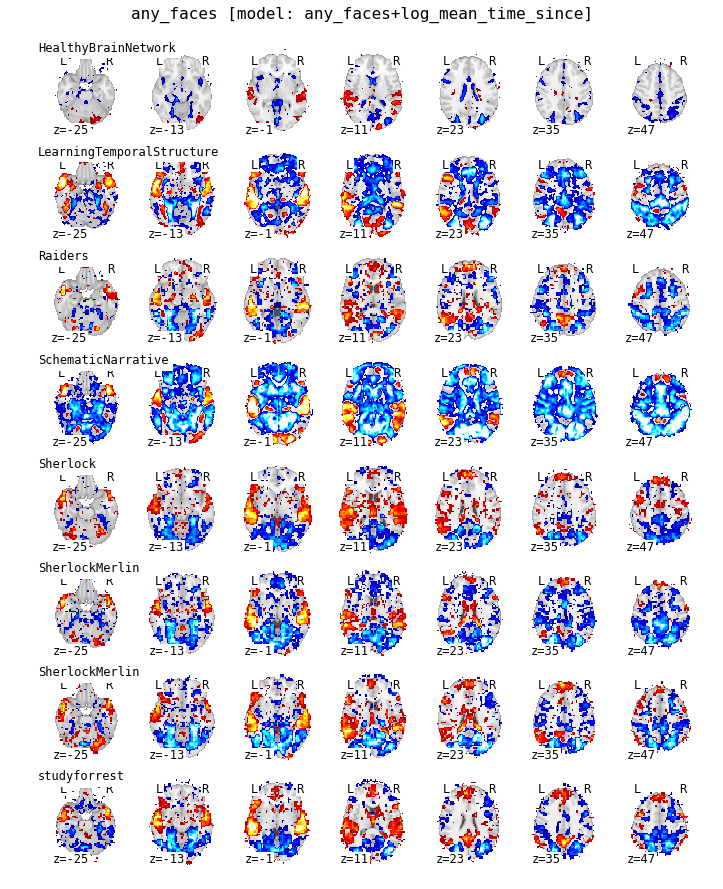

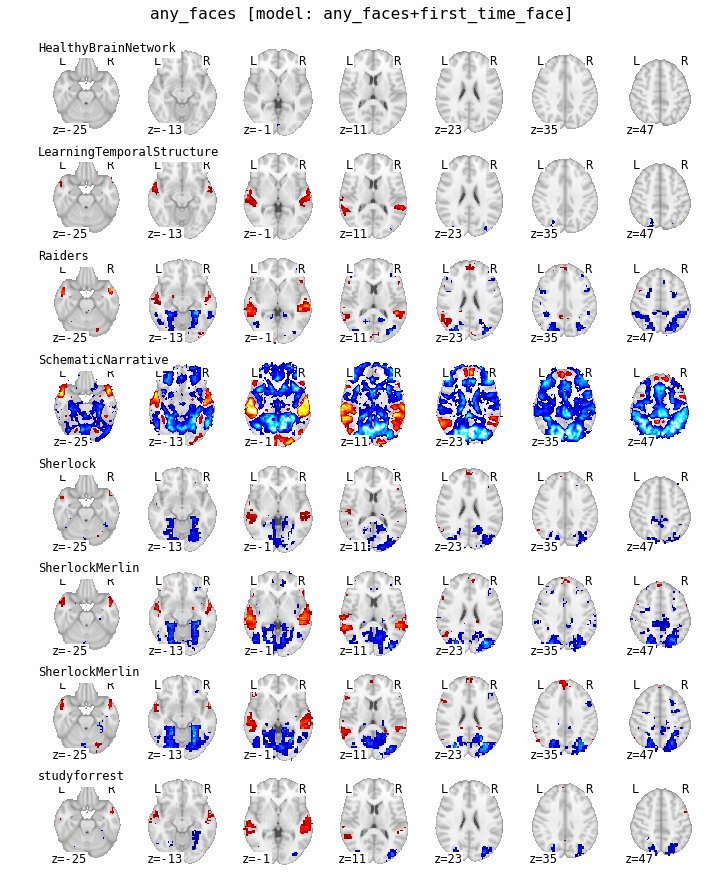

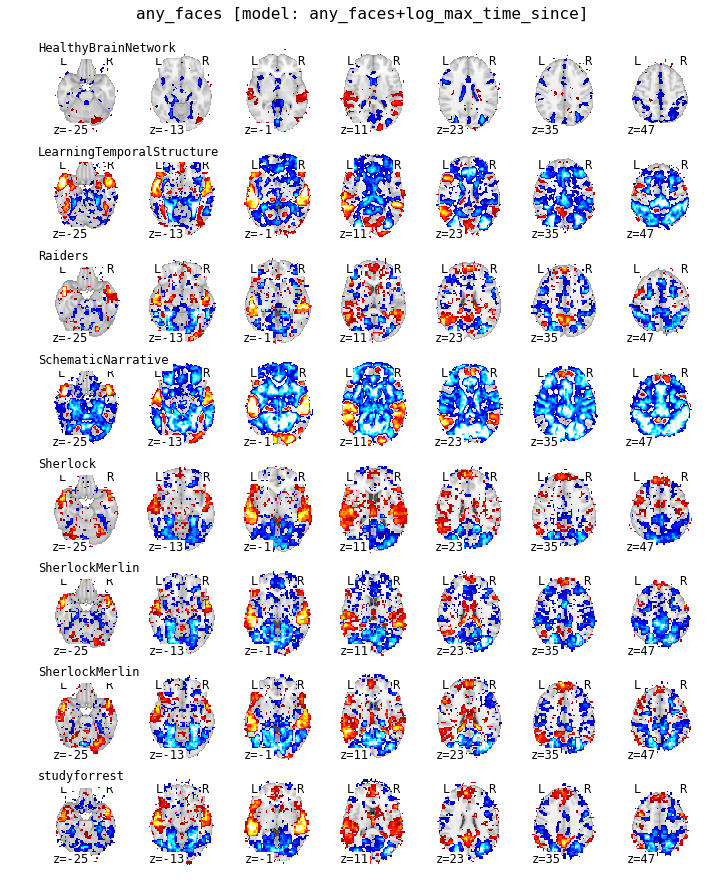

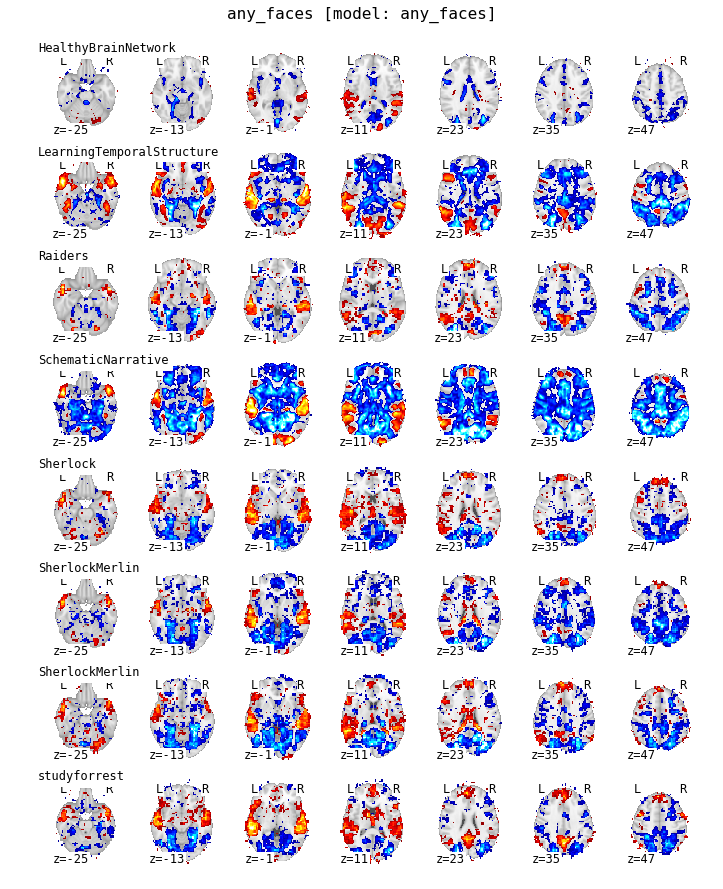

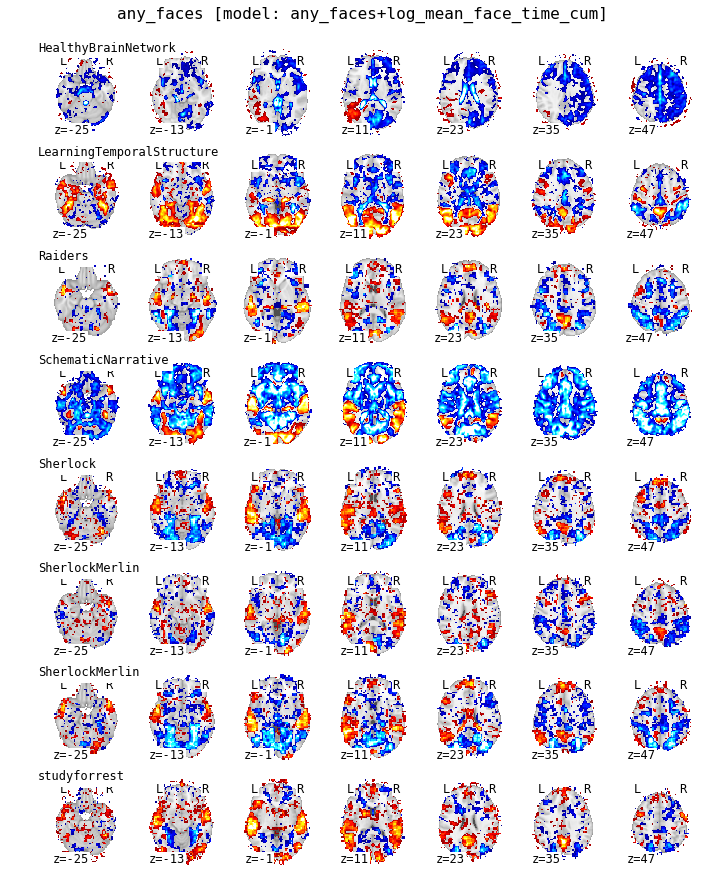

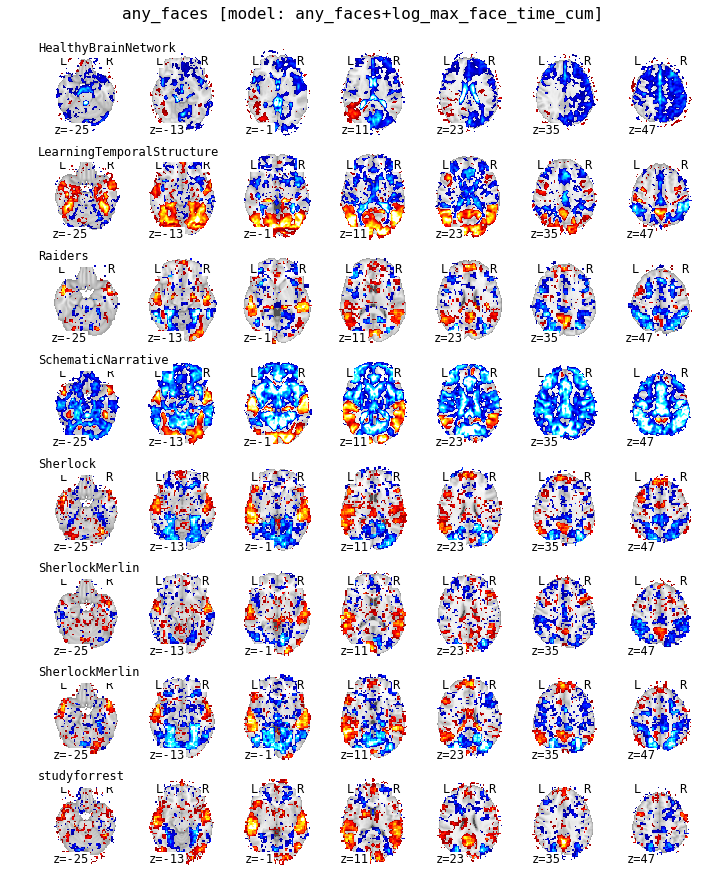

In [7]:
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_analysis(flat_models,
                         contrasts=['any_faces'],
                         vmax=10, display_mode='z', figsize=(12,15),
                         threshold=1.96, colorbar=False)

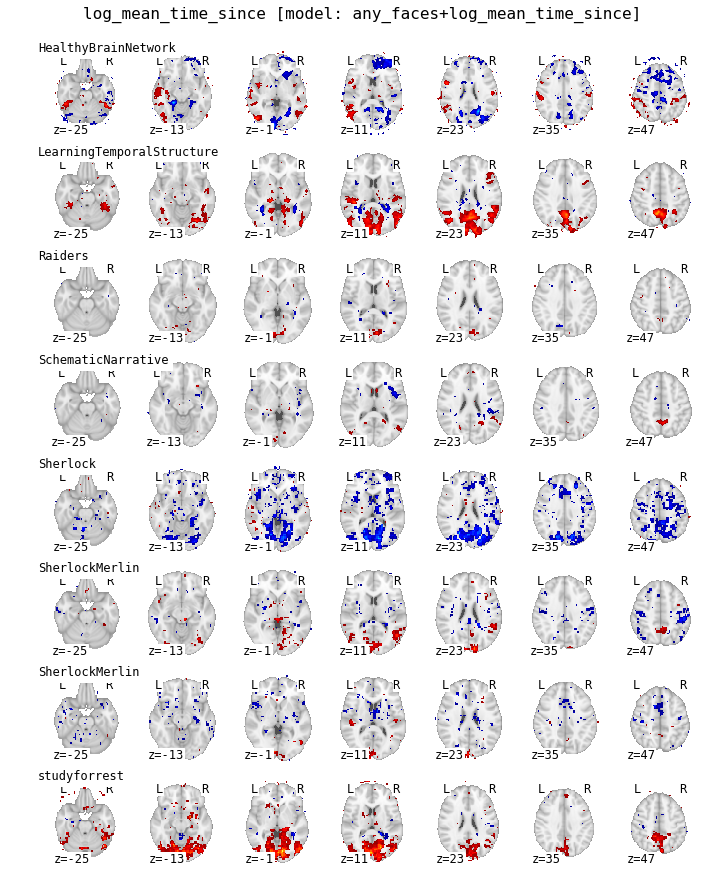

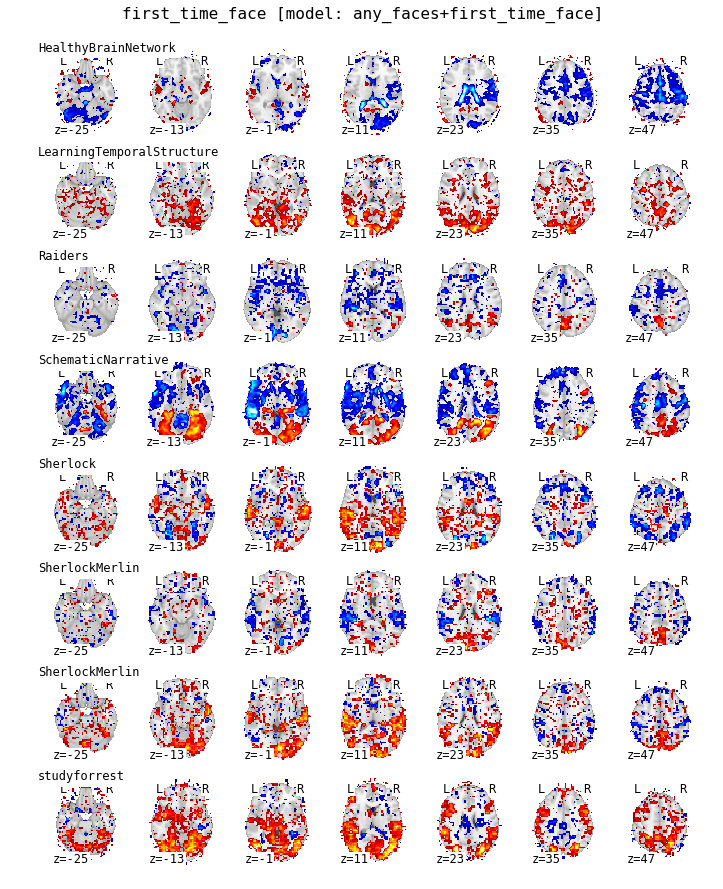

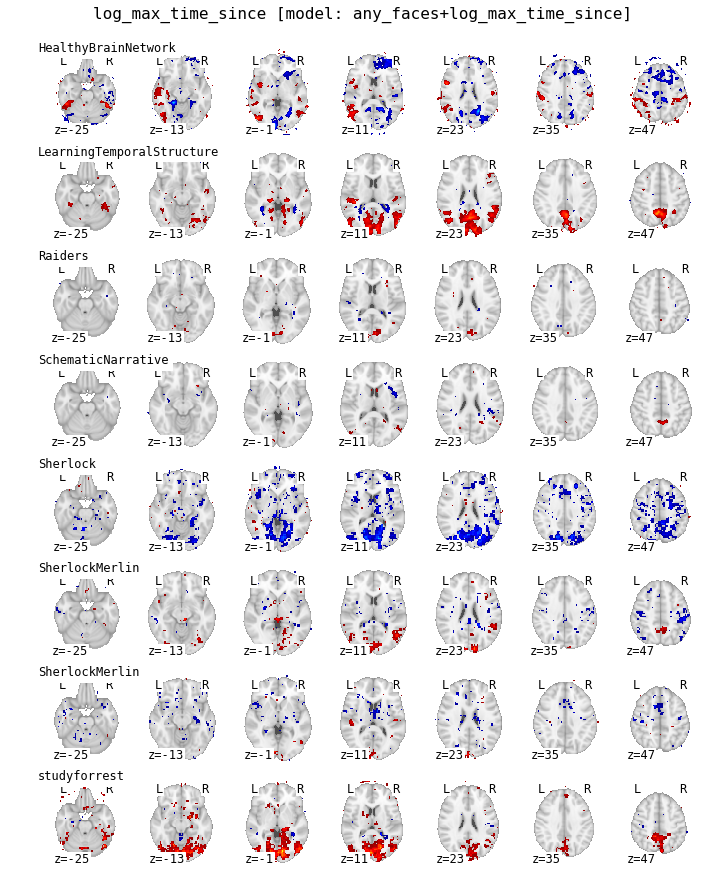

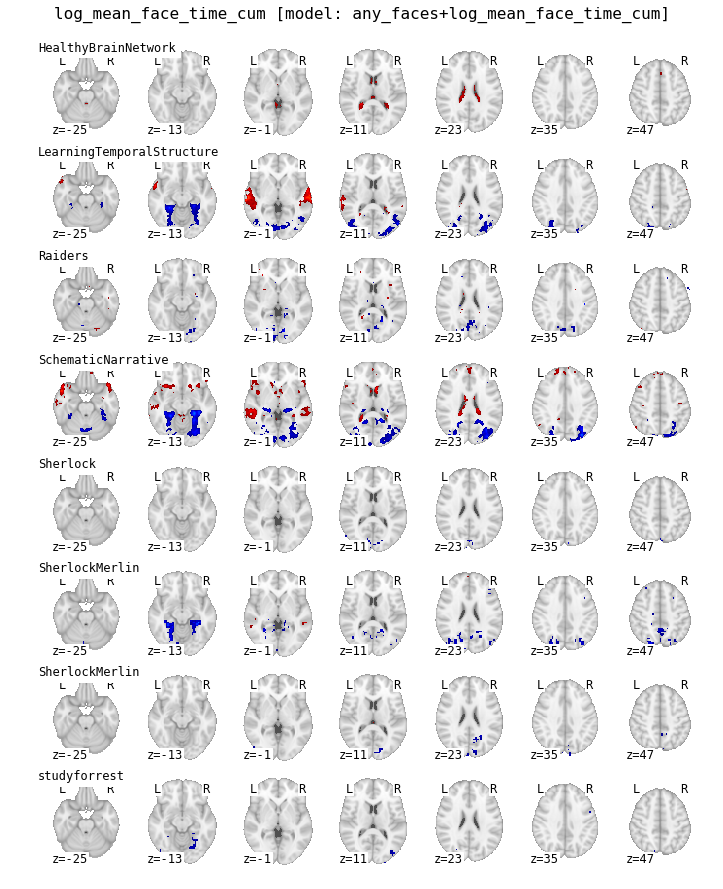

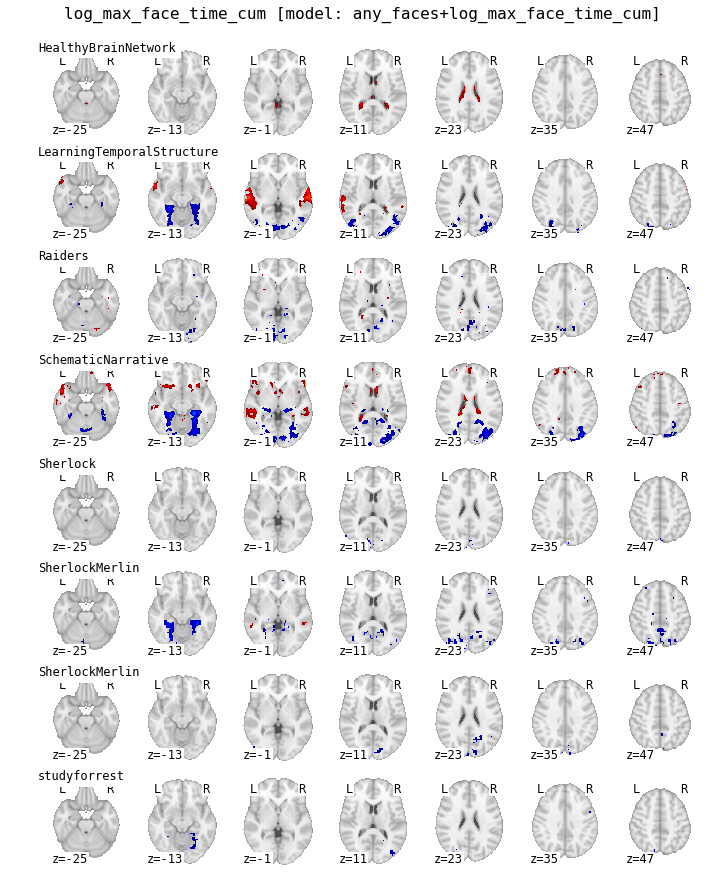

In [10]:
plot_contrast_by_analysis(flat_models,
                         contrasts=other,
                         vmax=10, display_mode='z', figsize=(12,15),
                         threshold=1.96, colorbar=False)